In [3]:
import os
import json
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from ImageDataset import ImageDataset
from torch_dct import dct_2d
import torch


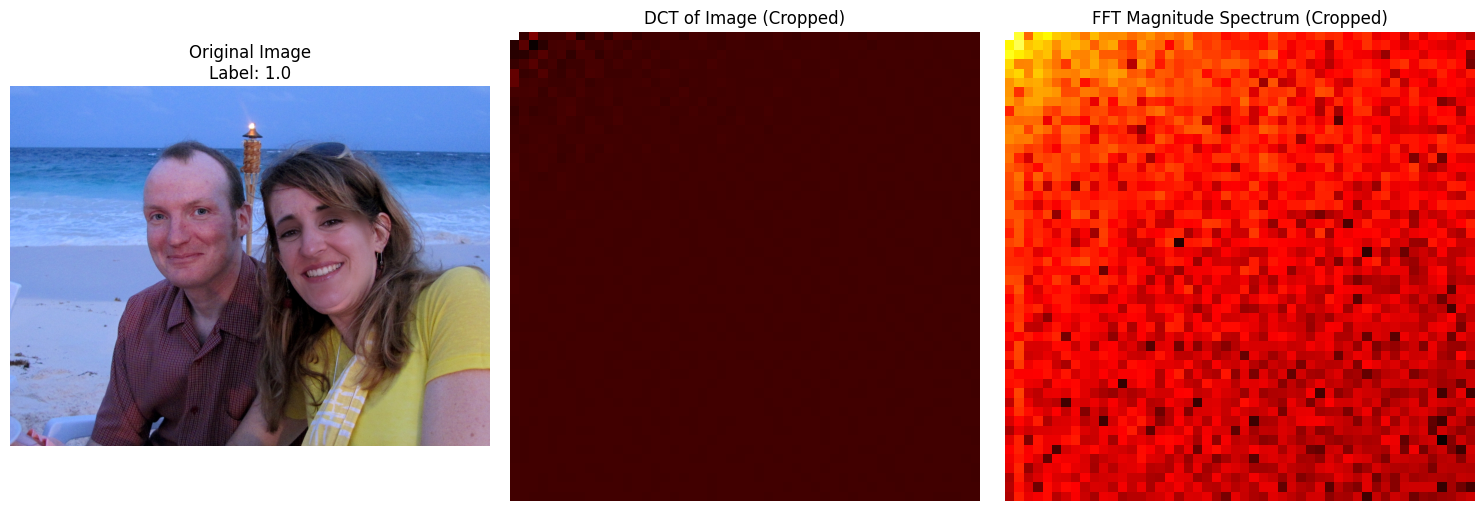

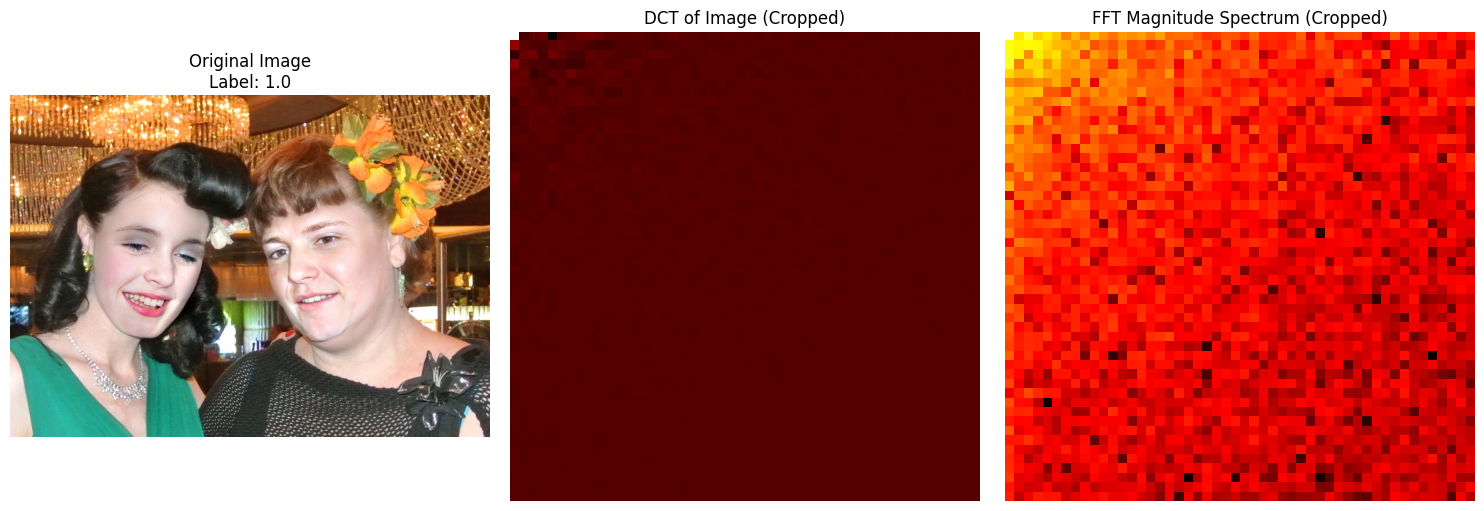

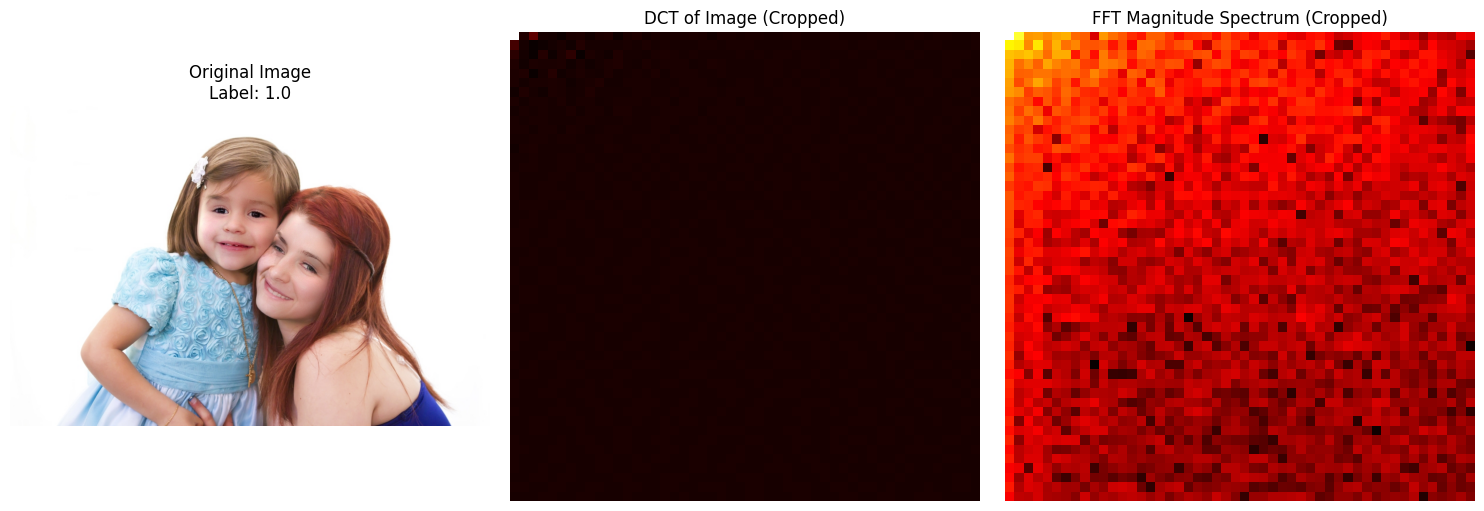

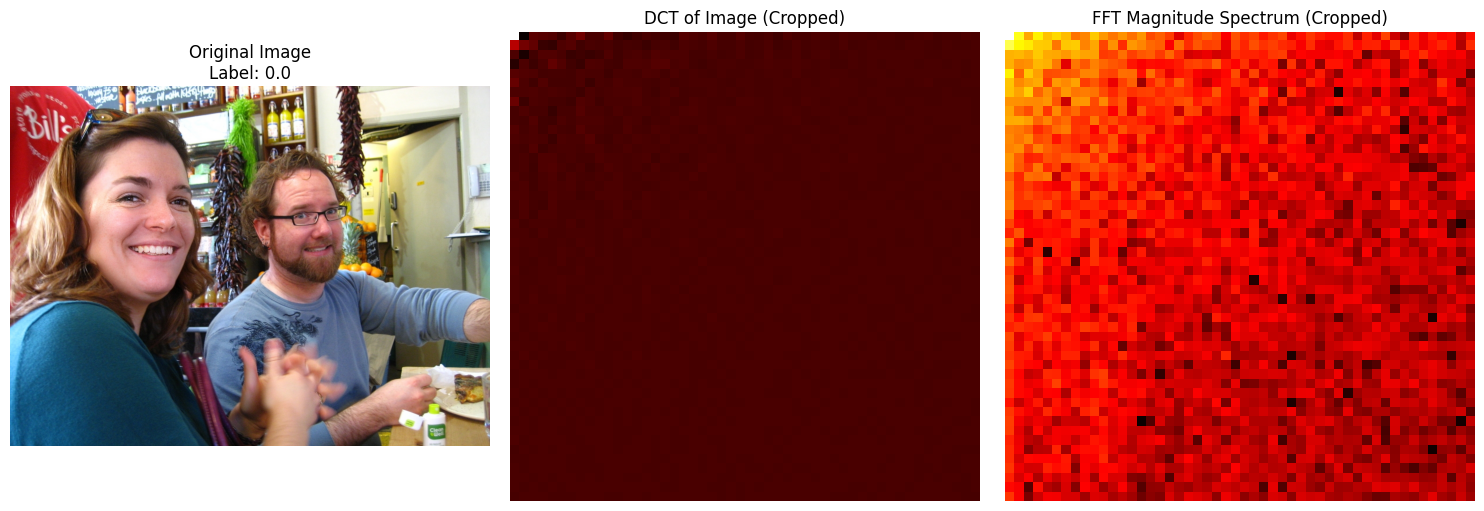

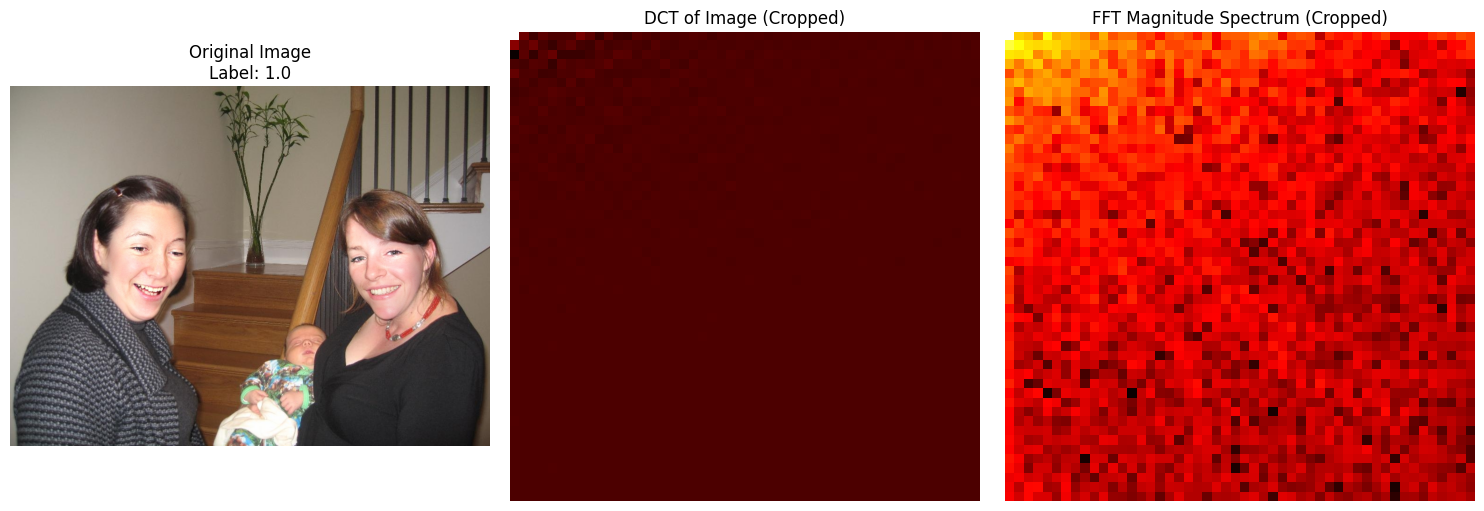

In [14]:
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from ImageDataset import ImageDataset
from torch_dct import dct_2d

# Paths
images_dir = "../../data/val"
annotations_path = "../../data/annotations/val.json"

# Transform
transform = transforms.Compose([
    transforms.ToTensor()
])

# Dataset and DataLoader
dataset = ImageDataset(annotations_path, images_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Utility Functions
def normalize_image(image):
    """
    Normalize an image or transform result to range [0, 1].
    """
    min_val = image.min()
    max_val = image.max()
    return (image - min_val) / (max_val - min_val + 1e-8)

def crop_top_left(image, size=50):
   
    return image[:, :size, :size]

def compute_fft(image):
  
    fft_result = torch.fft.fft2(image)
    magnitude = torch.abs(fft_result)  # Compute magnitude
    magnitude_log = torch.log1p(magnitude)  # Log scale for visualization
    return magnitude_log

def visualize_examples_with_dct_and_fft(dataloader, num_examples=5):
   
    count = 0
    for images, labels in dataloader:
    
        image = images[0] 

        dct_image = torch.stack([dct_2d(image[c]) for c in range(image.shape[0])])
        fft_image = torch.stack([compute_fft(image[c]) for c in range(image.shape[0])]) 
    
        dct_normalized = torch.stack([normalize_image(dct_image[c]) for c in range(dct_image.shape[0])])
        fft_normalized = torch.stack([normalize_image(fft_image[c]) for c in range(fft_image.shape[0])])
    
        dct_cropped = crop_top_left(dct_normalized)
        fft_cropped = crop_top_left(fft_normalized)

        image_np = image.permute(1, 2, 0).numpy()  
        dct_cropped_np = dct_cropped[0].numpy()  
        fft_cropped_np = fft_cropped[0].numpy()   

        plt.figure(figsize=(15, 5))
        
    
        plt.subplot(1, 3, 1)
        plt.imshow(image_np)
        plt.title(f"Original Image\nLabel: {labels[0]}")
        plt.axis("off")
        
        plt.subplot(1, 3, 2)
        plt.imshow(dct_cropped_np, cmap='hot')  
        plt.title("DCT of Image (Cropped)")
        plt.axis("off")
        
 
        plt.subplot(1, 3, 3)
        plt.imshow(fft_cropped_np, cmap='hot')
        plt.title("FFT Magnitude Spectrum (Cropped)")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
        
        count += 1
        if count >= num_examples:
            break


visualize_examples_with_dct_and_fft(dataloader, num_examples=5)




In [9]:
# get statistics for train set
with open("../../data/annotations/train.json", "r") as train_file:
    train_annotations = json.load(train_file)

seen_image_ids = set()
train_fake = 0
train_real = 0
for image_annotation in train_annotations["annotations"]:
    image_id = image_annotation["image_id"]
    if image_id in seen_image_ids:
        continue
    seen_image_ids.add(image_id)
    if image_annotation["category_id"] == 1:
        train_fake += 1
    else:
        train_real += 1

print(train_real + train_fake)
print(train_real)
print(train_fake)








44097
19555
24542


In [12]:
# get statistics for train set
with open("../../data/annotations/val.json", "r") as val_file:
    val_annotations = json.load(val_file)

seen_image_ids = set()
val_fake = 0
val_real = 0
for image_annotation in val_annotations["annotations"]:
    image_id = image_annotation["image_id"]
    if image_id in seen_image_ids:
        continue
    seen_image_ids.add(image_id)
    if image_annotation["category_id"] == 1:
        val_fake += 1
    else:
        val_real += 1

print(val_real + val_fake)
print(val_real)
print(val_fake)

7308
2229
5079


In [13]:
# get statistics for train set
with open("../../data/annotations/test-dev.json", "r") as test_dev_file:
    test_dev_annotations = json.load(test_dev_file)

seen_image_ids = set()
test_dev_fake = 0
test_dev_real = 0
for image_annotation in test_dev_annotations["annotations"]:
    image_id = image_annotation["image_id"]
    if image_id in seen_image_ids:
        continue
    seen_image_ids.add(image_id)
    if image_annotation["category_id"] == 1:
        test_dev_fake += 1
    else:
        test_dev_real += 1

print(test_dev_real + test_dev_fake)
print(test_dev_real)
print(test_dev_fake)

18895
7174
11721


In [14]:
# get statistics for train set
with open("../../data/annotations/test-dev.json", "r") as test_file:
    test_annotations = json.load(test_file)

seen_image_ids = set()
test_fake = 0
test_real = 0
for image_annotation in test_annotations["annotations"]:
    image_id = image_annotation["image_id"]
    if image_id in seen_image_ids:
        continue
    seen_image_ids.add(image_id)
    if image_annotation["category_id"] == 1:
        test_fake += 1
    else:
        test_real += 1

print(test_real + test_fake)
print(test_real)
print(test_fake)

18895
7174
11721
